<a href="https://colab.research.google.com/github/SABRIS13/Introduction-to-Data-Science/blob/main/Analisis_de_datos_salud_Pandas_y_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis de Datos

In [188]:
info="""
OCI Data Science - Useful TipsCheck for Public Internet Access
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
Helpful Documentation
Data Science Service Documentation
ADS documentation
Typical Cell Imports and Settings for ADS
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
Useful Environment Variables
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
"""

## **1. Cargando dataset**



In [172]:
import pandas as pd

In [87]:
datos=pd.read_csv("framingham.csv")
datos.head()

#from ads.dataset.factory import DatasetFactory
#ds=DatasetFactory.open('framingham.csv')
#ds.head()
#type(ds)


male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [88]:
datos.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [89]:
datos.shape

(4238, 16)

## **2. Cargando el CSV**

### **2.1 Creando DatasetFactory**

In [173]:
# Importando la biblioteca ADS para crear un ADS DataSet
#import ads

# Utilizando DatasetFactory para crear un Dataset ADS
#from ads.dataset.factory import DatasetFactory

# Creando un Dataset ADS
#ds = DatasetFactory.open('framingham.csv')

# Mostrando el tipo de objeto ds
#type(ds)

# Mostrando el tipo de objeto datos
#type(datos)

# Mostrando el Dataset ds
#ds

# Creando el diccionario que contiene el nombre de las columnas en inglés como llave y su traducción al español como valor
# dict_ing_esp = {
#                    'male': 'sexo',
#                     'age': 'edad',
#                    'education': 'escolaridad',
#                     'currentSmoker': 'fumador',
#                     'cigsPerDay': 'cigarrillos_por_dia',                     
#                    'BPMeds': 'uso_medicamento_presion',
#                    'prevalentStroke': 'acv',
#                    'prevalentHyp': 'hipertension',
#                    'diabetes': 'diabetes',
#                    'totChol': 'colesterol_total',
#                    'sysBP': 'presion_arterial_sistolica',
#                    'diaBP': 'presion_arterial_diastolica',
#                    'BMI': 'imc',
#                    'heartRate': 'frecuencia_cardiaca',
#                    'glucose': 'glicemia',
#                    'TenYearCHD': 'riesgo_eac_decada'


# Renombrando las columnas
#ds =ds.rename_columns(columns=dict_ing_esp)

# Mostrando el nombre de las columnas 
#ds.columns

# Mostrando las 5 primeras filas de ds
#ds.head()

# Excluyendo la columna ‘escolaridad’
#ds = ds.drop_columns('escolaridad')

# Mostrando nuevamente el nombre de las columnas
#ds.columns

In [91]:
dict={
    'male':'sexo', 
    'age':'edad', 
    'education':'escolaridad', 
    'currentSmoker':'fumador', 
    'cigsPerDay':'cigarros_por_dia', 
    'BPMeds':'uso_medicamento_presion',
    'prevalentStroke':'acv', 
    'prevalentHyp':'hipertension',
    'diabetes':'diabetes', 
    'totChol':'colesterol_total', 
    'sysBP':'presion_arterial_sistolica',
    'diaBP':'presion_arterial_diastolica', 
    'BMI':'imc', 
    'heartRate':'frecuencia_cardiaca', 
    'glucose':'glicemina', 
    'TenYearCHD':'riesdo_eac_decada'
}

In [92]:
datos.rename(columns=dict,inplace=True)
datos

sexo  edad  escolaridad  fumador  cigarros_por_dia  \
0        1    39          4.0        0               0.0   
1        0    46          2.0        0               0.0   
2        1    48          1.0        1              20.0   
3        0    61          3.0        1              30.0   
4        0    46          3.0        1              23.0   
...    ...   ...          ...      ...               ...   
4233     1    50          1.0        1               1.0   
4234     1    51          3.0        1              43.0   
4235     0    48          2.0        1              20.0   
4236     0    44          1.0        1              15.0   
4237     0    52          2.0        0               0.0   

      uso_medicamento_presion  acv  hipertension  diabetes  colesterol_total  \
0                         0.0    0             0         0             195.0   
1                         0.0    0             0         0             250.0   
2                         0.0    0             0         0             245.0   
3                         0.0    0             1         0             225.0   
4                         0.0    0             0         0             285.0   
...                       ...  ...           ...       ...               ...   
4233                      0.0    0             1         0             313.0   
4234                      0.0    0             0         0             207.0   
4235                      NaN    0             0         0             248.0   
4236                      0.0    0             0         0             210.0   
4237                      0.0    0             0         0             269.0   

      presion_arterial_sistolica  presion_arterial_diastolica    imc  \
0                          106.0                         70.0  26.97   
1                          121.0                         81.0  28.73   
2                          127.5                         80.0  25.34   
3                          150.0                         95.0  28.58   
4                          130.0                         84.0  23.10   
...                          ...                          ...    ...   
4233                       179.0                         92.0  25.97   
4234                       126.5                         80.0  19.71   
4235                       131.0                         72.0  22.00   
4236                       126.5                         87.0  19.16   
4237                       133.5                         83.0  21.47   

      frecuencia_cardiaca  glicemina  riesdo_eac_decada  
0                    80.0       77.0                  0  
1                    95.0       76.0                  0  
2                    75.0       70.0                  0  
3                    65.0      103.0                  1  
4                    85.0       85.0                  0  
...                   ...        ...                ...  
4233                 66.0       86.0                  1  
4234                 65.0       68.0                  0  
4235                 84.0       86.0                  0  
4236                 86.0        NaN                  0  
4237                 80.0      107.0                  0  

[4238 rows x 16 columns]

In [93]:
datos.drop(columns=['escolaridad'],inplace=True)
datos.head()

sexo  edad  fumador  cigarros_por_dia  uso_medicamento_presion  acv  \
0     1    39        0               0.0                      0.0    0   
1     0    46        0               0.0                      0.0    0   
2     1    48        1              20.0                      0.0    0   
3     0    61        1              30.0                      0.0    0   
4     0    46        1              23.0                      0.0    0   

   hipertension  diabetes  colesterol_total  presion_arterial_sistolica  \
0             0         0             195.0                       106.0   
1             0         0             250.0                       121.0   
2             0         0             245.0                       127.5   
3             1         0             225.0                       150.0   
4             0         0             285.0                       130.0   

   presion_arterial_diastolica    imc  frecuencia_cardiaca  glicemina  \
0                         70.0  26.97                 80.0       77.0   
1                         81.0  28.73                 95.0       76.0   
2                         80.0  25.34                 75.0       70.0   
3                         95.0  28.58                 65.0      103.0   
4                         84.0  23.10                 85.0       85.0   

   riesdo_eac_decada  
0                  0  
1                  0  
2                  0  
3                  1  
4                  0

### **2.2 Creando un ADS DataFrame**

In [94]:
# Mostrando la clasificación estadística y los tipos de valores de cada columna del DataFrame
#ds.summary()

# Mostrando los valores únicos de la columna ‘cigarrillos_por_dia’
#ds.cigarrillos_por_dia.unique()

# Mostrando la cantidad total de valores nulos en cada columna del DataFrame
#ds.isnull().sum()

# Creando un vector booleano (True y False) que posee el valor True en las filas donde la columna ‘cigarrillos_por_dia’ no posee valores nulos
#seleccion_correctos = ds.cigarrillos_por_dia.notnull()

# Aplicando la selección de la variable seleccion_correctos al DataFrame
#ds = ds[seleccion_correctos]

# Realizando la selección de filas no nulas con notnull de las columnas  ‘uso_medicamento_presion’, ‘colesterol_total’, ‘imc’ y ‘frecuencia_cardiaca’
#ds = ds[ds.uso_medicamento_presion.notnull()]
#ds = ds[ds.colesterol_total.notnull()]
#ds = ds[ds.imc.notnull()]
#ds = ds[ds.frecuencia_cardiaca.notnull()]

In [95]:
seleccion_correctos=datos.cigarros_por_dia.unique()
seleccion_correctos

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [96]:
datos.isnull().sum()

sexo                             0
edad                             0
fumador                          0
cigarros_por_dia                29
uso_medicamento_presion         53
acv                              0
hipertension                     0
diabetes                         0
colesterol_total                50
presion_arterial_sistolica       0
presion_arterial_diastolica      0
imc                             19
frecuencia_cardiaca              1
glicemina                      388
riesdo_eac_decada                0
dtype: int64

In [97]:
seleccion_correctos=datos.cigarros_por_dia.notnull()


In [98]:
datos=datos[seleccion_correctos]

In [99]:
datos.isnull().sum()

sexo                             0
edad                             0
fumador                          0
cigarros_por_dia                 0
uso_medicamento_presion         53
acv                              0
hipertension                     0
diabetes                         0
colesterol_total                50
presion_arterial_sistolica       0
presion_arterial_diastolica      0
imc                             19
frecuencia_cardiaca              1
glicemina                      384
riesdo_eac_decada                0
dtype: int64

In [100]:
datos=datos[datos.uso_medicamento_presion.notnull()]
datos=datos[datos.colesterol_total .notnull()]
datos=datos[datos.imc.notnull()]
datos=datos[datos.frecuencia_cardiaca.notnull()]

In [101]:
datos.isnull().sum()

sexo                             0
edad                             0
fumador                          0
cigarros_por_dia                 0
uso_medicamento_presion          0
acv                              0
hipertension                     0
diabetes                         0
colesterol_total                 0
presion_arterial_sistolica       0
presion_arterial_diastolica      0
imc                              0
frecuencia_cardiaca              0
glicemina                      339
riesdo_eac_decada                0
dtype: int64

Ánalisis de la columna de glicemina, no nos podemos eliminar los datos en blanco porque es un gran número de registros. Se deberá de investigar que valores esperar en dicha columna

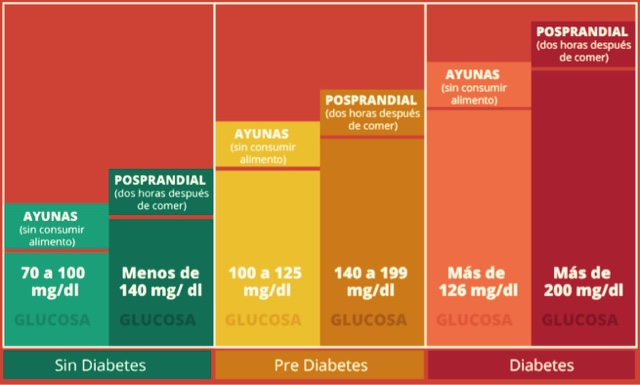

### **2.3 Tratamiento de datos faltantes**

In [102]:
# Creando un subset solamente con las personas diabéticas
# personas_con_diabetes = ds[ds.diabetes == 1]

# Creando un subset solamente con las personas no diabéticas
# personas_sin_diabetes = ds[ds.diabetes == 0]

# Mostrando las 5 primeras filas de la columna ‘glicemia’ del subset                         # personas_con_diabetes  
# personas_con_diabetes.glicemia.head()

# Verificando el promedio de glicemia para personas diabéticas
# personas_con_diabetes.glicemia.mean()

# Verificando el promedio de glicemia para personas no diabéticas
# personas_sin_diabetes.glicemia.mean()

# Exhibiendo estadísticas descriptivas de la columna 'glicemia'
# ds.glicemia.describe()

# Conteo del número de valores en la columna 'diabetes'
# ds.diabetes.value_counts()

# Importando la biblioteca Seaborn de visualización de datos
# import seaborn as sns

# Creando una gráfica de distribución de diabetes
# ax = sns.distplot(personas_con_diabetes.glicemia, norm_hist=False)

# Definiendo los valores para inicio y fin del eje x en la gráfica
# ax.set_xlim(0,400)

# Creando el mismo gráfico para personas sin diabetes
# ax = sns.distplot(personas_sin_diabetes.glicemia, norm_hist=False)
# ax.set_xlim(0,400)

# Seleccionando solamente los datos para glicemia que son nulos.
# nulos = ds.glicemia.isnull()

# Seleccionando las filas con valores nulos de glicemia en la columna ‘diabetes’ y  contando los datos
# ds[nulos].diabetes.value_counts()

# Calculando el promedio de valores de la columna ‘glicemia’
# ds.glicemia.mean()

# Llenando los datos faltantes en la columna ‘glicemia’ con el valor 81.8 y aplicando la sustitución directamente en el dataset
# ds.fillna({'glicemia': 81.8}, inplace = True)

In [103]:
personas_sin_diabetes=datos[datos.diabetes==1]

In [104]:
personas_con_diabetes=datos[datos.diabetes==0]

In [105]:
personas_sin_diabetes.glicemina.mean()

169.87254901960785

In [106]:
personas_con_diabetes.glicemina.mean()

79.42226487523992

In [107]:
datos.glicemina.describe()

count    3749.000000
mean       81.883169
std        23.888039
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glicemina, dtype: float64

In [108]:
datos.diabetes.value_counts(normalize=True)

0    0.97456
1    0.02544
Name: diabetes, dtype: float64

<ipython-input-109-d648f094d196>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(personas_con_diabetes.glicemina,norm_hist=False);


(0.0, 400.0)

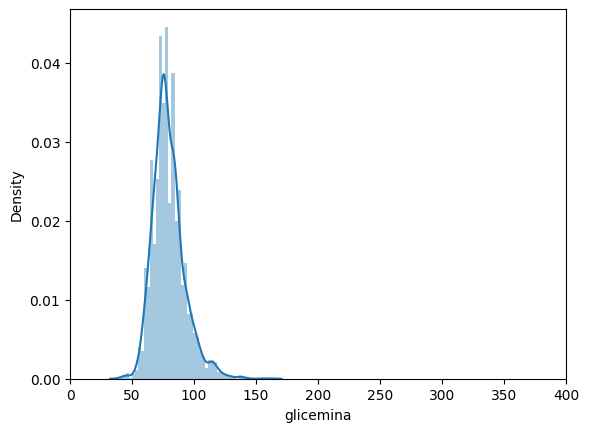

In [109]:
import seaborn as sns

ax=sns.distplot(personas_con_diabetes.glicemina,norm_hist=False);
ax.set_xlim(0,400)

<ipython-input-110-7485e1cc6e88>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(personas_sin_diabetes.glicemina,norm_hist=False);


(0.0, 400.0)

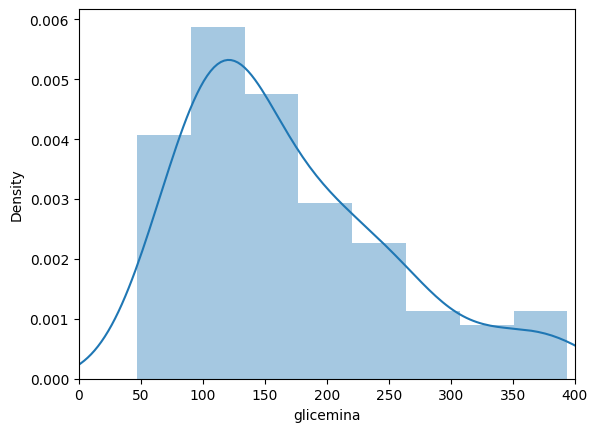

In [110]:
ax=sns.distplot(personas_sin_diabetes.glicemina,norm_hist=False);
ax.set_xlim(0,400)

In [111]:
nulos=datos.glicemina.isnull()

In [112]:
datos[nulos].diabetes.value_counts()

0    337
1      2
Name: diabetes, dtype: int64

Al analizar nuestra base de datos, percibimos que existen algunos datos nulos en la columna de ‘glicemia’. Explorando más a fondo estos datos faltantes y relacionándolos con la columna de ‘diabetes’, identificamos que existem 337 datos nulos de ‘glicemia’ para las personas sin diabetes y 2 para personas con diabetes.

In [113]:
datos.glicemina.mean()

81.88316884502534

Con excepción de la celda con el código de para rellenar las celdas con valores NaN: ds.fillna({'glicemia': 81.8}).

In [114]:
datos.fillna({'glicemia': 81.8})

sexo  edad  fumador  cigarros_por_dia  uso_medicamento_presion  acv  \
0        1    39        0               0.0                      0.0    0   
1        0    46        0               0.0                      0.0    0   
2        1    48        1              20.0                      0.0    0   
3        0    61        1              30.0                      0.0    0   
4        0    46        1              23.0                      0.0    0   
...    ...   ...      ...               ...                      ...  ...   
4232     1    68        0               0.0                      0.0    0   
4233     1    50        1               1.0                      0.0    0   
4234     1    51        1              43.0                      0.0    0   
4236     0    44        1              15.0                      0.0    0   
4237     0    52        0               0.0                      0.0    0   

      hipertension  diabetes  colesterol_total  presion_arterial_sistolica  \
0                0         0             195.0                       106.0   
1                0         0             250.0                       121.0   
2                0         0             245.0                       127.5   
3                1         0             225.0                       150.0   
4                0         0             285.0                       130.0   
...            ...       ...               ...                         ...   
4232             1         0             176.0                       168.0   
4233             1         0             313.0                       179.0   
4234             0         0             207.0                       126.5   
4236             0         0             210.0                       126.5   
4237             0         0             269.0                       133.5   

      presion_arterial_diastolica    imc  frecuencia_cardiaca  glicemina  \
0                            70.0  26.97                 80.0       77.0   
1                            81.0  28.73                 95.0       76.0   
2                            80.0  25.34                 75.0       70.0   
3                            95.0  28.58                 65.0      103.0   
4                            84.0  23.10                 85.0       85.0   
...                           ...    ...                  ...        ...   
4232                         97.0  23.14                 60.0       79.0   
4233                         92.0  25.97                 66.0       86.0   
4234                         80.0  19.71                 65.0       68.0   
4236                         87.0  19.16                 86.0        NaN   
4237                         83.0  21.47                 80.0      107.0   

      riesdo_eac_decada  
0                     0  
1                     0  
2                     0  
3                     1  
4                     0  
...                 ...  
4232                  1  
4233                  1  
4234                  0  
4236                  0  
4237                  0  

[4088 rows x 15 columns]

Para las personas con diabetes,se  relleno los datos nulos de la columna ‘glicemia’ con el promedio de glicemia para las personas con diabetes (este valor ya fue calculado en el aula):

In [115]:
datos.fillna({'glicemina':81.8},inplace=True)

Otro enfoque para rellenar valores nulos

In [116]:
promedio_personas_con_diabetes = personas_con_diabetes .glicemina.mean()
promedio_personas_con_diabetes

79.42226487523992

In [117]:
#glicemia
promedio_personas_sin_diabetes = personas_sin_diabetes .glicemina.mean()
promedio_personas_sin_diabetes

169.87254901960785

In [118]:
import numpy as np

In [119]:
def promedio_segun_diabetes(df, personas_con_diabetes, personas_sin_diabetes):
    nueva_glicemina = []
    for i, row in df.iterrows():
        if np.isnan(row.glicemina):
            if row.diabetes == 1:
                nueva_glicemina.append(personas_con_diabetes.glicemina.mean().round(2))
            elif row.diabetes == 0:
                nueva_glicemina.append(personas_sin_diabetes.glicemina.mean().round(2))
        else:
            nueva_glicemina.append(row.glicemina)
    return nueva_glicemina

In [120]:
nueva_glicemia = promedio_segun_diabetes(datos, personas_con_diabetes, personas_sin_diabetes)
serie_glicemia = pd.Series(nueva_glicemia)
datos = datos.reset_index()
datos['glicemia_nueva']= serie_glicemia


In [121]:
datos

index  sexo  edad  fumador  cigarros_por_dia  uso_medicamento_presion  \
0         0     1    39        0               0.0                      0.0   
1         1     0    46        0               0.0                      0.0   
2         2     1    48        1              20.0                      0.0   
3         3     0    61        1              30.0                      0.0   
4         4     0    46        1              23.0                      0.0   
...     ...   ...   ...      ...               ...                      ...   
4083   4232     1    68        0               0.0                      0.0   
4084   4233     1    50        1               1.0                      0.0   
4085   4234     1    51        1              43.0                      0.0   
4086   4236     0    44        1              15.0                      0.0   
4087   4237     0    52        0               0.0                      0.0   

      acv  hipertension  diabetes  colesterol_total  \
0       0             0         0             195.0   
1       0             0         0             250.0   
2       0             0         0             245.0   
3       0             1         0             225.0   
4       0             0         0             285.0   
...   ...           ...       ...               ...   
4083    0             1         0             176.0   
4084    0             1         0             313.0   
4085    0             0         0             207.0   
4086    0             0         0             210.0   
4087    0             0         0             269.0   

      presion_arterial_sistolica  presion_arterial_diastolica    imc  \
0                          106.0                         70.0  26.97   
1                          121.0                         81.0  28.73   
2                          127.5                         80.0  25.34   
3                          150.0                         95.0  28.58   
4                          130.0                         84.0  23.10   
...                          ...                          ...    ...   
4083                       168.0                         97.0  23.14   
4084                       179.0                         92.0  25.97   
4085                       126.5                         80.0  19.71   
4086                       126.5                         87.0  19.16   
4087                       133.5                         83.0  21.47   

      frecuencia_cardiaca  glicemina  riesdo_eac_decada  glicemia_nueva  
0                    80.0       77.0                  0            77.0  
1                    95.0       76.0                  0            76.0  
2                    75.0       70.0                  0            70.0  
3                    65.0      103.0                  1           103.0  
4                    85.0       85.0                  0            85.0  
...                   ...        ...                ...             ...  
4083                 60.0       79.0                  1            79.0  
4084                 66.0       86.0                  1            86.0  
4085                 65.0       68.0                  0            68.0  
4086                 86.0       81.8                  0            81.8  
4087                 80.0      107.0                  0           107.0  

[4088 rows x 17 columns]

In [122]:
datos.isnull().sum()

index                          0
sexo                           0
edad                           0
fumador                        0
cigarros_por_dia               0
uso_medicamento_presion        0
acv                            0
hipertension                   0
diabetes                       0
colesterol_total               0
presion_arterial_sistolica     0
presion_arterial_diastolica    0
imc                            0
frecuencia_cardiaca            0
glicemina                      0
riesdo_eac_decada              0
glicemia_nueva                 0
dtype: int64

## **3. Preparando los datos**

### **3.1 Transformando datos**

In [123]:
datos.info()
#ds.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        4088 non-null   int64  
 1   sexo                         4088 non-null   int64  
 2   edad                         4088 non-null   int64  
 3   fumador                      4088 non-null   int64  
 4   cigarros_por_dia             4088 non-null   float64
 5   uso_medicamento_presion      4088 non-null   float64
 6   acv                          4088 non-null   int64  
 7   hipertension                 4088 non-null   int64  
 8   diabetes                     4088 non-null   int64  
 9   colesterol_total             4088 non-null   float64
 10  presion_arterial_sistolica   4088 non-null   float64
 11  presion_arterial_diastolica  4088 non-null   float64
 12  imc                          4088 non-null   float64
 13  frecuencia_cardiac

In [129]:
datos['cigarros_por_dia']=datos['cigarros_por_dia'].astype('int64')
datos['uso_medicamento_presion']=datos['uso_medicamento_presion'].astype('int64')
#
#ds=ds.astype(types={'cigarros_por_dia':'int64','uso_medicamento_presion':'int64'})

In [130]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        4088 non-null   int64  
 1   sexo                         4088 non-null   int64  
 2   edad                         4088 non-null   int64  
 3   fumador                      4088 non-null   int64  
 4   cigarros_por_dia             4088 non-null   int64  
 5   uso_medicamento_presion      4088 non-null   int64  
 6   acv                          4088 non-null   int64  
 7   hipertension                 4088 non-null   int64  
 8   diabetes                     4088 non-null   int64  
 9   colesterol_total             4088 non-null   float64
 10  presion_arterial_sistolica   4088 non-null   float64
 11  presion_arterial_diastolica  4088 non-null   float64
 12  imc                          4088 non-null   float64
 13  frecuencia_cardiac

### **3.2 Ejecutando transformaciones**

In [131]:
datos.cigarros_por_dia.describe()
#ds.cigarros_por_dia.describe()

count    4088.000000
mean        8.992417
std        11.910941
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigarros_por_dia, dtype: float64

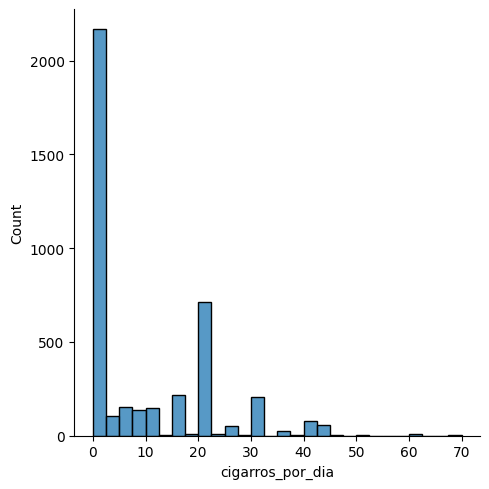

In [135]:
ax=sns.displot(datos.cigarros_por_dia);
#  ax=sns.displot(ds.cigarrillos_por_dia,norm_hist=False)
#ax.set_xlim(0,70)

In [136]:
datos.fumador.value_counts()
#ds.fumador.value_counts()

0    2084
1    2004
Name: fumador, dtype: int64

<Axes: >

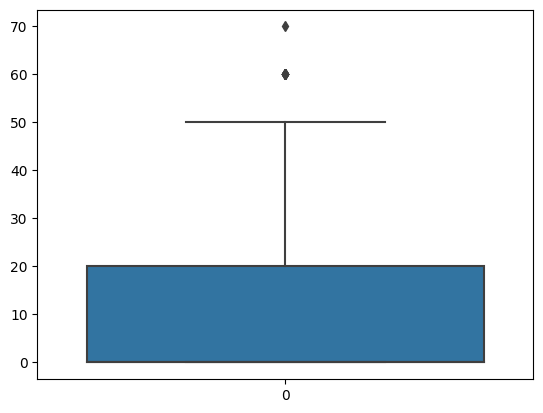

In [137]:
sns.boxplot(datos.cigarros_por_dia)

In [138]:
datos.cigarros_por_dia.mean()

8.992416829745597

Definiendo las categorías de acuerdo con la cantidad de cigarrillos consumidos por día:

0 - no fumador;

1 - fumador leve (1 a 10 cigarrillos por día);

2 - fumador moderado (11 a 20 cigarrillos por día);

3 - fumador severo (más de 20 cigarrillos por día).

In [139]:
categorias=[0,1,2,3]
limites=[-1,1,11,21,71]

In [140]:
categoria_fumador=pd.cut(datos.cigarros_por_dia,limites,labels=categorias)

In [143]:
datos['categoria_fumador']=categoria_fumador
#ds=ds.assign_column('categoria_fumador',categoria_fumador)

In [144]:
datos.head()

index  sexo  edad  fumador  cigarros_por_dia  uso_medicamento_presion  acv  \
0      0     1    39        0                 0                        0    0   
1      1     0    46        0                 0                        0    0   
2      2     1    48        1                20                        0    0   
3      3     0    61        1                30                        0    0   
4      4     0    46        1                23                        0    0   

   hipertension  diabetes  colesterol_total  presion_arterial_sistolica  \
0             0         0             195.0                       106.0   
1             0         0             250.0                       121.0   
2             0         0             245.0                       127.5   
3             1         0             225.0                       150.0   
4             0         0             285.0                       130.0   

   presion_arterial_diastolica    imc  frecuencia_cardiaca  glicemina  \
0                         70.0  26.97                 80.0       77.0   
1                         81.0  28.73                 95.0       76.0   
2                         80.0  25.34                 75.0       70.0   
3                         95.0  28.58                 65.0      103.0   
4                         84.0  23.10                 85.0       85.0   

   riesdo_eac_decada  glicemia_nueva categoria_fumador  
0                  0            77.0                 0  
1                  0            76.0                 0  
2                  0            70.0                 2  
3                  1           103.0                 3  
4                  0            85.0                 3

### 3.3 Visualizando datos con ADS



In [145]:
#ds.show_in_notebook()

### **3.4 Generando más visualizaciones**

<Axes: ylabel='Frequency'>

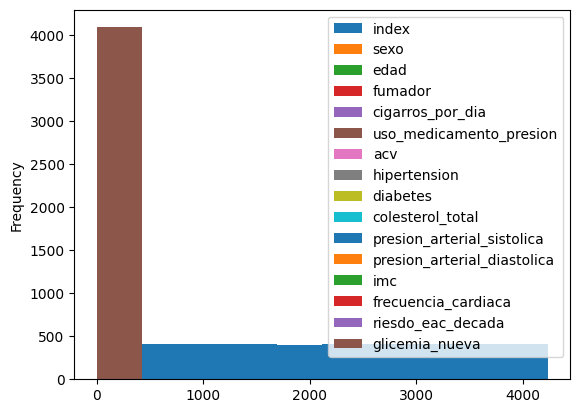

In [157]:
datos.plot('glicemina',kind='hist')
#ds.plot('glicemina')

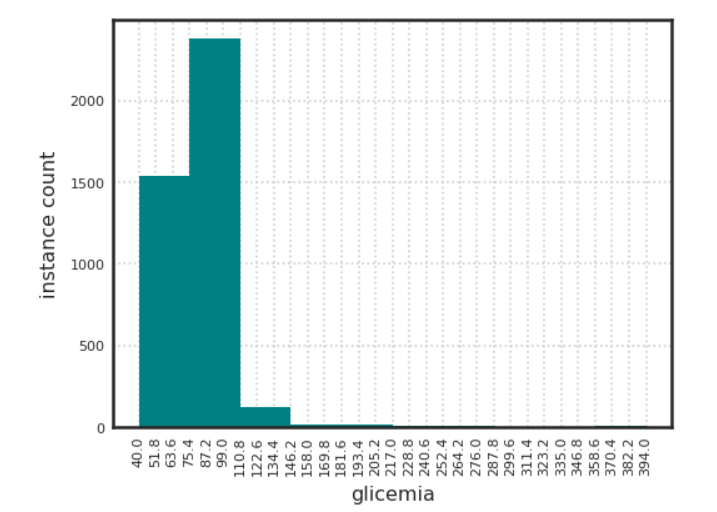

<Axes: ylabel='Frequency'>

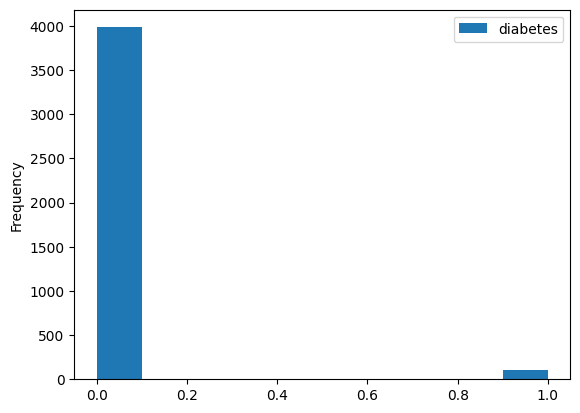

In [154]:
datos.plot('glicemina','diabetes',kind='hist')
#ds.plot('glicemina','diabetes')

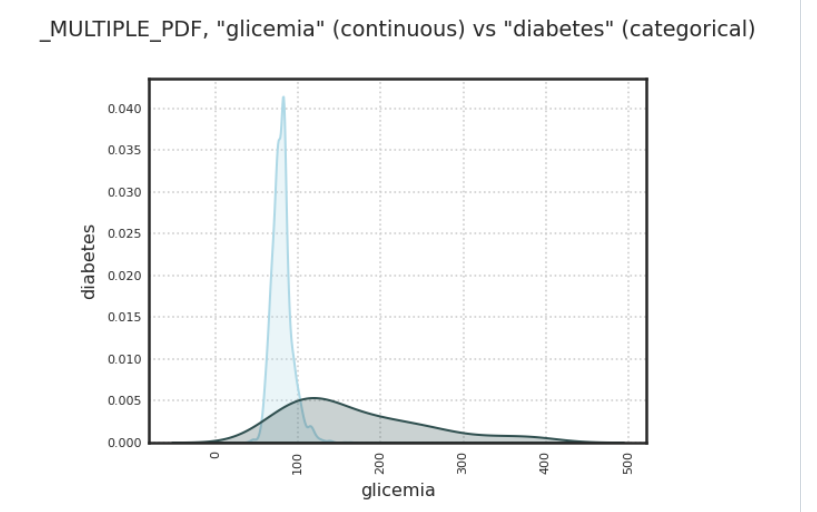

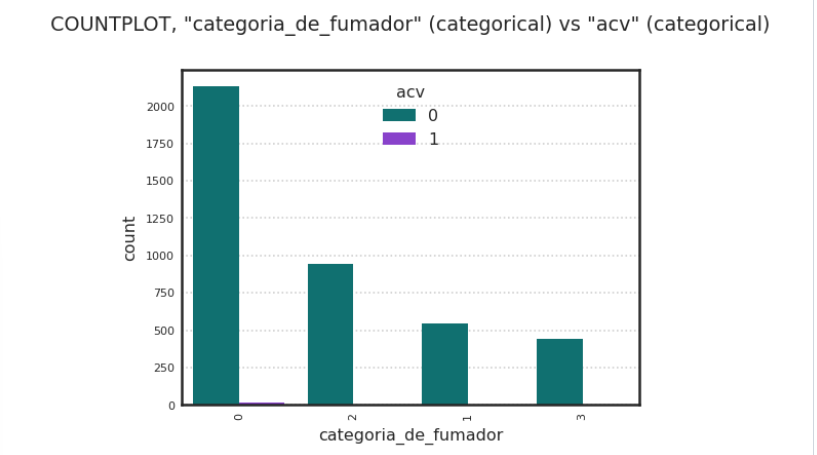

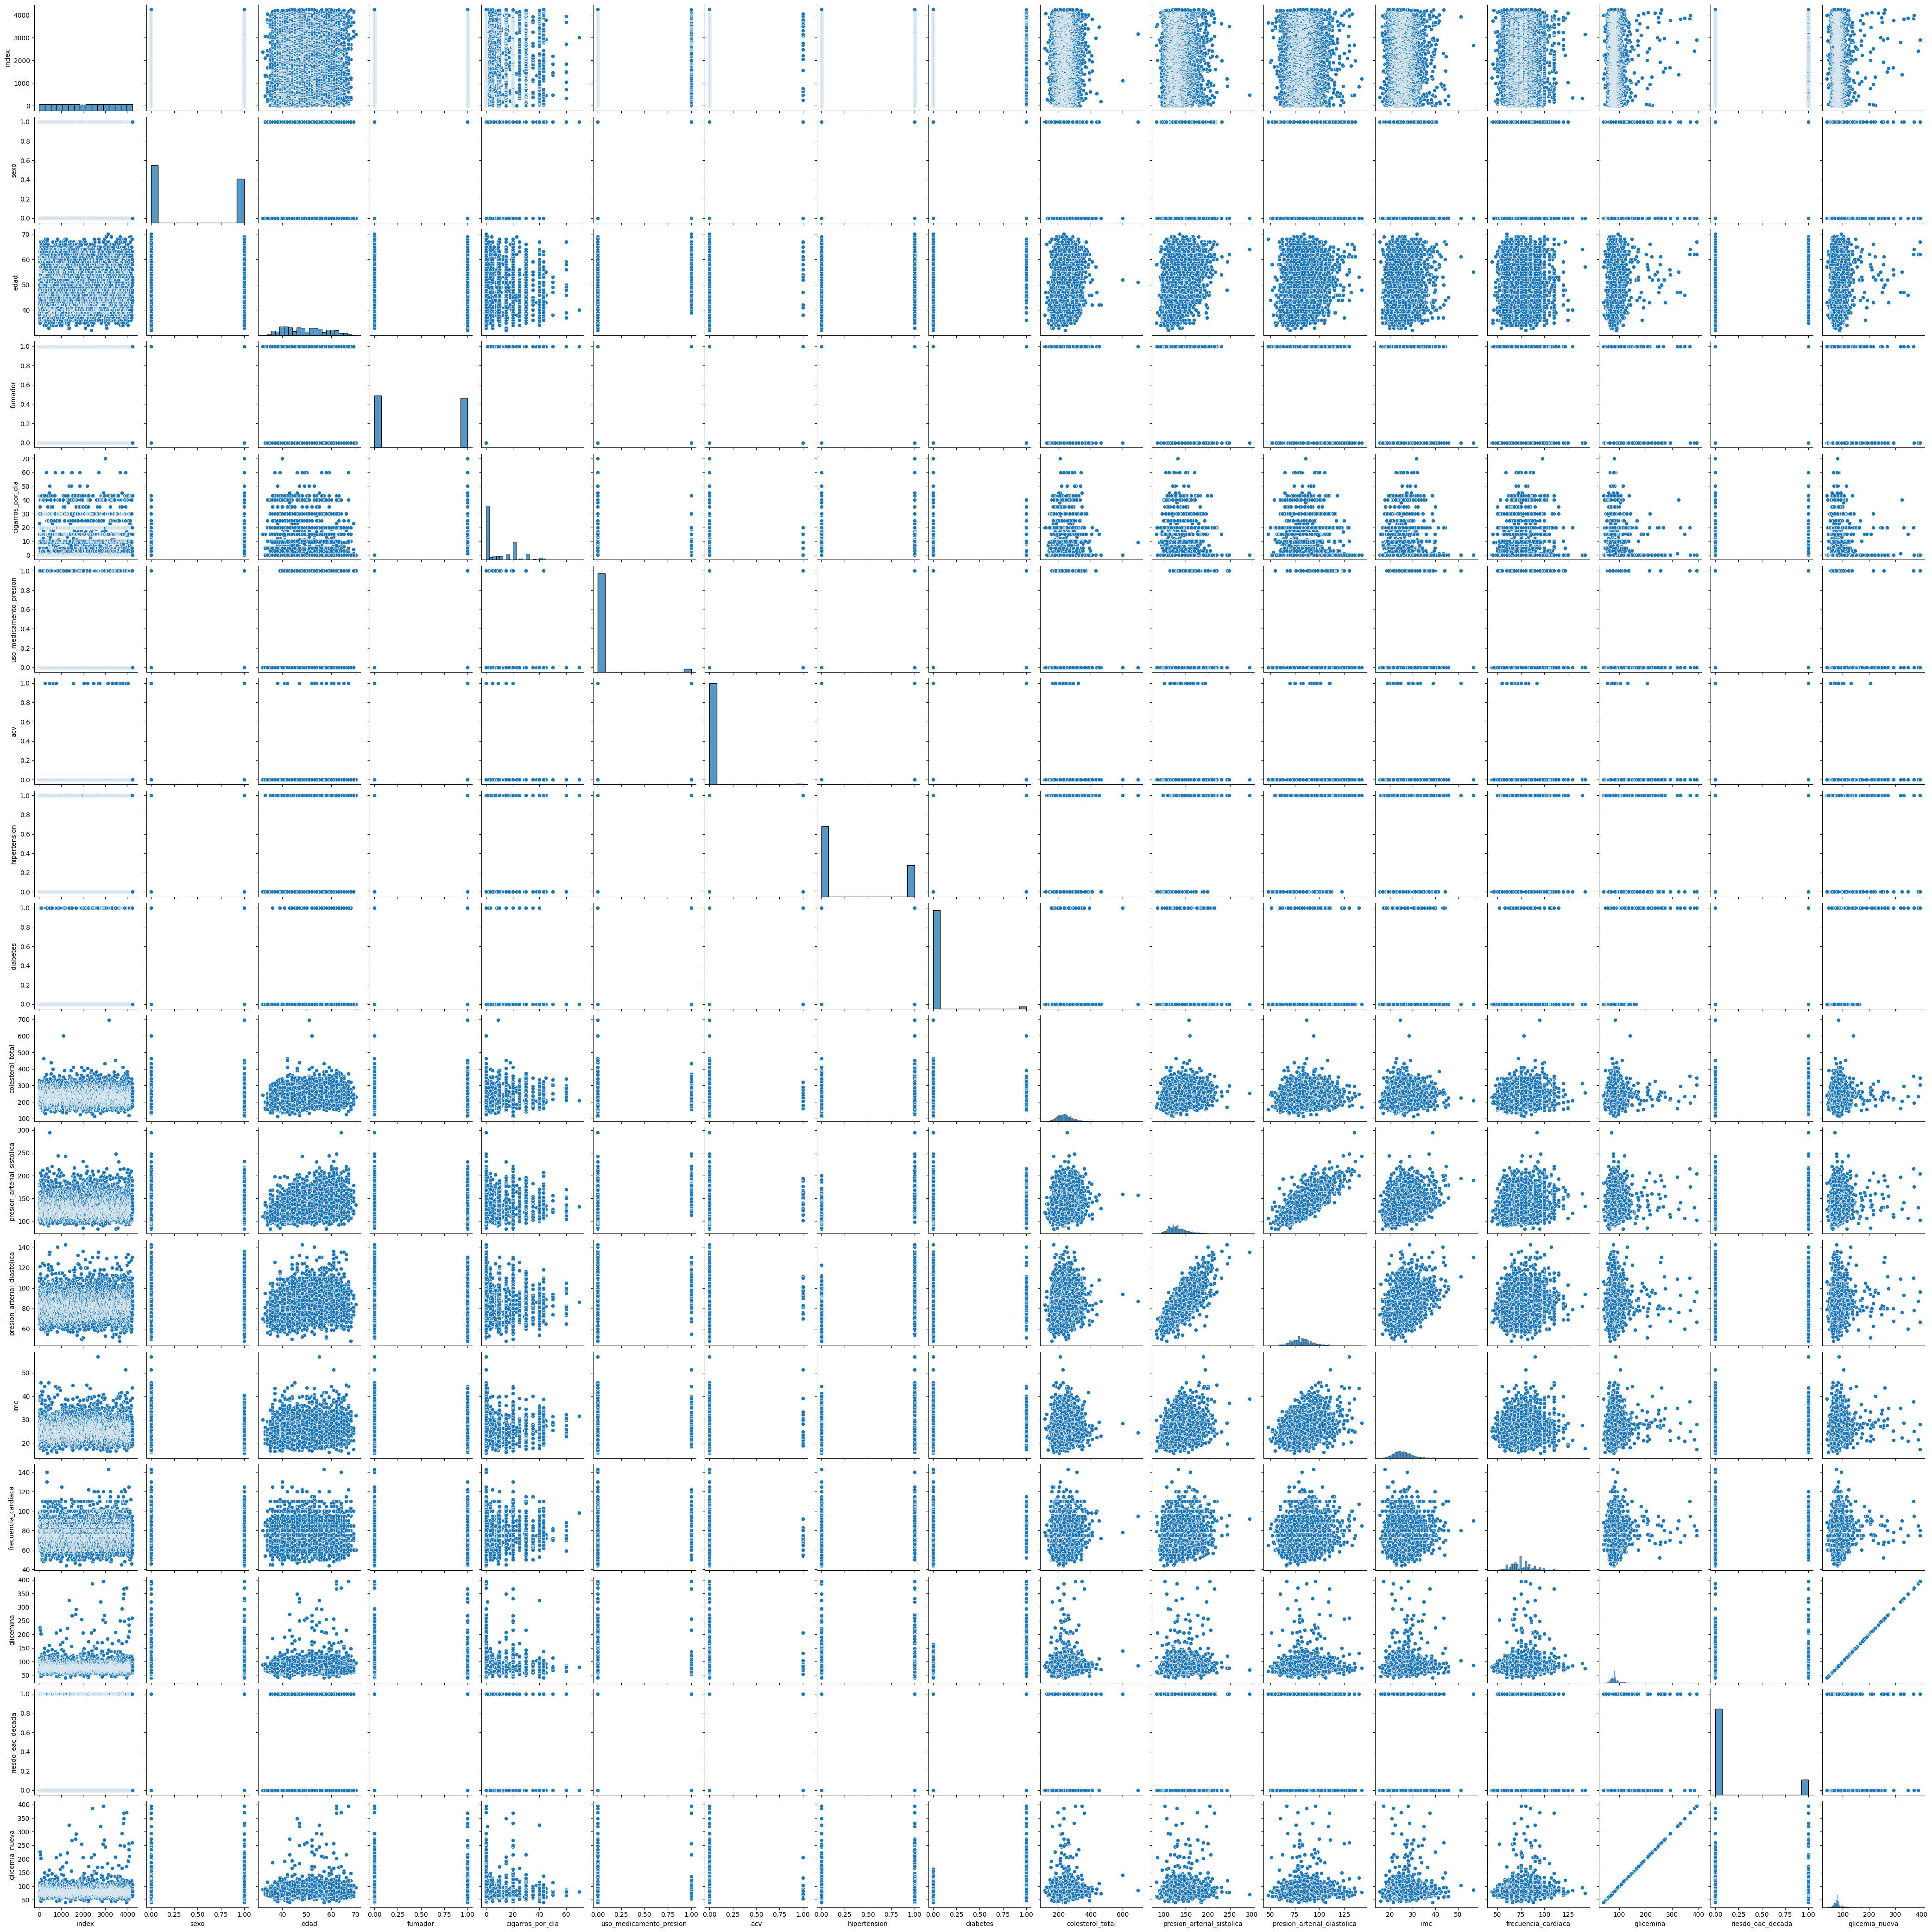

In [150]:
sns.pairplot(datos)
#sns.pairplot(ds)
#pandas_ds = ds.to_pandas()
#sns.pairplot(pandas_ds)

## **4. Correlación**

### **4.1 Correlación de variables númericas**

In [166]:
datos.corr(numeric_only=False)
#ds.corr()

index      sexo      edad   fumador  \
index                        1.000000  0.025114  0.006715  0.005784   
sexo                         0.025114  1.000000 -0.023015  0.199287   
edad                         0.006715 -0.023015  1.000000 -0.215080   
fumador                      0.005784  0.199287 -0.215080  1.000000   
cigarros_por_dia             0.008237  0.322215 -0.190383  0.769987   
uso_medicamento_presion      0.026515 -0.050173  0.125478 -0.048777   
acv                          0.031151 -0.003798  0.044201 -0.032002   
hipertension                 0.025099  0.009135  0.303271 -0.102312   
diabetes                     0.041417  0.015020  0.104877 -0.043453   
colesterol_total            -0.004539 -0.065808  0.262911 -0.048494   
presion_arterial_sistolica   0.010026 -0.032574  0.389943 -0.130159   
presion_arterial_diastolica  0.010452  0.060364  0.203561 -0.107839   
imc                          0.003776  0.080700  0.134536 -0.170169   
frecuencia_cardiaca          0.031322 -0.114814 -0.011746  0.057172   
glicemina                    0.024242  0.003177  0.113808 -0.051893   
riesdo_eac_decada           -0.000848  0.096060  0.226849  0.025360   
glicemia_nueva               0.024242  0.003177  0.113808 -0.051893   
categoria_fumador            0.008886  0.304529 -0.208733  0.864132   

                             cigarros_por_dia  uso_medicamento_presion  \
index                                0.008237                 0.026515   
sexo                                 0.322215                -0.050173   
edad                                -0.190383                 0.125478   
fumador                              0.769987                -0.048777   
cigarros_por_dia                     1.000000                -0.043939   
uso_medicamento_presion             -0.043939                 1.000000   
acv                                 -0.033362                 0.125864   
hipertension                        -0.062994                 0.259934   
diabetes                            -0.038379                 0.054735   
colesterol_total                    -0.026620                 0.082272   
presion_arterial_sistolica          -0.085891                 0.258830   
presion_arterial_diastolica         -0.050922                 0.195667   
imc                                 -0.090474                 0.102511   
frecuencia_cardiaca                  0.071100                 0.013895   
glicemina                           -0.052875                 0.051107   
riesdo_eac_decada                    0.063060                 0.085618   
glicemia_nueva                      -0.052875                 0.051107   
categoria_fumador                    0.958290                -0.050181   

                                  acv  hipertension  diabetes  \
index                        0.031151      0.025099  0.041417   
sexo                        -0.003798      0.009135  0.015020   
edad                         0.044201      0.303271  0.104877   
fumador                     -0.032002     -0.102312 -0.043453   
cigarros_por_dia            -0.033362     -0.062994 -0.038379   
uso_medicamento_presion      0.125864      0.259934  0.054735   
acv                          1.000000      0.066541  0.009350   
hipertension                 0.066541      1.000000  0.076787   
diabetes                     0.009350      0.076787  1.000000   
colesterol_total             0.007670      0.163659  0.043748   
presion_arterial_sistolica   0.054581      0.693520  0.102785   
presion_arterial_diastolica  0.048708      0.613649  0.052245   
imc                          0.030565      0.304447  0.086747   
frecuencia_cardiaca         -0.011750      0.147475  0.053966   
glicemina                    0.015425      0.082527  0.609615   
riesdo_eac_decada            0.044186      0.173806  0.089132   
glicemia_nueva               0.015425      0.082527  0.609615   
categoria_fumador           -0.031617     -0.083621 -0.039867   

                             colesterol

In [159]:
import matplotlib.pyplot as plt

<Axes: >

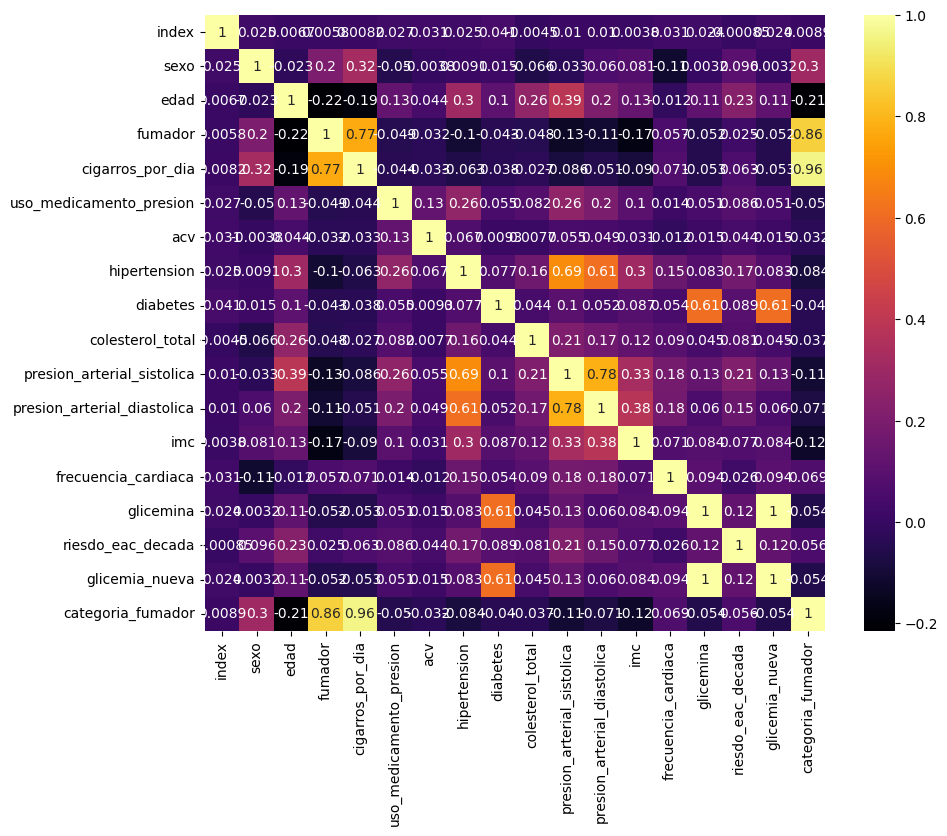

In [164]:
plt.figure(figsize=[10,8])
paleta=sns.color_palette('inferno',as_cmap=True)
sns.heatmap(datos.corr(numeric_only=False),annot=True,cmap=paleta)

### **4.2 ADS y sugerencias automáticas**

In [167]:
#ds.suggest_recommendations()

### **4.3 Aplicando sugerencias**

In [ ]:
# Creando un nuevo ADS DataFrame a partir de la base original
# base_original = DatasetFactory.open('framingham.csv', target='TenYearCHD')

# Traduciendo los nombres de las columnas
# base_original = base_original.rename_columns(dict_ing_esp)

# Verificando las sugerencias que ADS realiza para el dataset
# base_original.suggest_recommendations()

# Transformando la base original con base en las recomendaciones
# base_original = base_original.auto_transform()

# Visualizando la base pós alteraciones
# base_original.show_in_notebook()


### **4.4 Comparando las bases**

In [187]:
# ds.show_in_notebook()

## **5. Balanceo de los datos**

### **5.1 Balanceo**

In [168]:
#ds.target.show_in_notebook()

In [170]:
datos.columns

Index(['index', 'sexo', 'edad', 'fumador', 'cigarros_por_dia',
       'uso_medicamento_presion', 'acv', 'hipertension', 'diabetes',
       'colesterol_total', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca',
       'glicemina', 'riesdo_eac_decada', 'glicemia_nueva',
       'categoria_fumador'],
      dtype='object')

In [171]:
datos.riesdo_eac_decada.value_counts(normalize=True)

0    0.850538
1    0.149462
Name: riesdo_eac_decada, dtype: float64

### **5.2 Aplicando el balanceo**

In [174]:
datos.riesdo_eac_decada.value_counts()

0    3477
1     611
Name: riesdo_eac_decada, dtype: int64

In [ ]:
!pip install imbalanced-learn

In [177]:
import imblearn

In [179]:
#ds_balanceado=ds.up_sample(sampler='default')

In [180]:
#ds_balanceado.show_in_notebook()

### **5.3 Documentación de datos**

In [181]:
descripcion = """
- Información general: Esta base de datos se refiere a un estudio realizado recolectando datos sobre el estado de salud de los pacientes para tratar de clasificar el riesgo de enfermedad coronaria en los próximos 10 años. Para consultar la base original, puede acceder al siguiente [link](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression).

Los datos fueron modificados con el objetivo de corregir los problemas de la base y dejarla lista para poder realizar modelos empleando Machine Learning.

-Tipo de las Columnas:
    - 'sexo': booleano;
    - 'edad': numérico;
    - 'cigarrillos_por_dia': categórico;                                                                   
    - 'uso_medicamento_presion': booleano;
    - 'acv': booleano;
    - 'hipertension': booleano;
    - 'diabetes': booleano;
    - 'colesterol_total': numérico;
    - 'presion_arterial_sistolica': numérico;
    - 'presion_arterial_diastolica': numérico;
    - 'imc': numérico;
    - 'frecuencia_cardiaca': numérico;
    - 'glicemia': numérico;
    - 'riesgo_eac_decada': booleano.

- Detalle de las Columnas:
    - 'sexo': Considera masculino como 1 y femenino como 0;
    - 'edad': Edad en años completos;
    - 'cigarrillos_por_dia': Clasificación de las personas según la cantidad de cigarrillos consumidos por día:
        0 - no fumador;
        1 - fumador leve (1 a 10 cigarrillos por día);
        2 - fumador moderado (11 a 20 cigarrillos por día);
        3 - fumador severo (más de 20 cigarrillos por día).
    - 'uso_medicamento_presion': Si la persona toma o no medicamentos para la presión;
    - 'acv': Si ya tuvo Accidente Cerebro-Vascular;
    - 'hipertension': Si la persona sufre de hipertensión;
    - 'diabetes': Si la persona es diabética;
    - 'colesterol_total': Cantidad de colesterol total;
    - 'presion_arterial_sistolica': Presión arterial sistólica medida;
    - 'presion_arterial_diastolica': Presión arterial diastólica medida;
    - 'imc': Índice de masa corporal;
    - 'frecuencia_cardiaca': frecuencia cardíaca en pulsaciones por minuto;
    - 'glicemia': Cantidad de glicemia en la sangre,
    - 'riesgo_EAC_decada': Clasificación de riesgo para enfermedad coronaria en los próximos 10 años:
        0 - No está en el grupo de riesgo;
        1 - Está en el grupo de riesgo.
"""

In [182]:
#ds_balanceado.description

In [186]:
#ds_balanceado.set_description(descripcion)
#ds_balanceado.description

In [ ]:
#ds_balanceado.show_in_notebook()

### **5.4 Generando un CSV**

In [ ]:
#ds_balanceado.to_csv('datos_salud_final.csv', index=False)